## Intégration du langage SQL dans un programme
Dans ce TP, vous allez découvrir comment interroger une base de données depuis un programme écrit en python. Dans ce cas, le SGBD est le serveur et le programme est le client. La plupart des langages (le cobol, le langage C, le langage java...) permettent d'utiliser des requêtes SQL pour importer des données enregistrées de façon persistante dans une base de données. On parle de embedded SQL. Dans notre cas, nous allons utiliser le langage Python et le SGBD SQLite.   

Vous pouvez si nécessaire consulter la documentation en ligne de SQLite https://docs.python.org/3/library/sqlite3.html.


## Partie 1: Découvertes des instructions python

### Connexion à la base depuis un programme

Pour interagir avec notre base de données, nous utiliserons le package sqlite3.

+	La méthode connect prend en paramètre le chemin vers la base de données et retourne un objet de type Connection. Si la base n'existe pas, cette instruction crée une base vide.  

In [1]:
import sqlite3     
fichierDonnees='personne.db'    
conn=sqlite3.connect(fichierDonnees)  

+	Il ne faut pas oublier de fermer la connexion à la fin du programme 


In [2]:
conn.close()    


+	Une fois la connexion établie, on peut créer un curseur (un objet de type Cursor) par la méthode cursor() de Connection. 

In [3]:
cur=conn.cursor()     


ProgrammingError: Cannot operate on a closed database.

### Instructions create, update, delete     
+	Un curseur dispose d'une méthode execute() qui prend en paramètre une chaîne de caractères représentant une requête SQL. Exemple : CREATE, INSERT, UPDATE.     

In [ ]:
cur.execute("CREATE TABLE personne (nom text primary key, prenom text, age int);")
nom = 'Dupont'    
prenom='Paul'     
age = 72    
cur.execute("INSERT INTO personne VALUES (?, ?, ?);", (nom, prenom, age)) 

+	La méthode commit() de la classe Connection met à jour la base de données pour les autres utilisateurs. Sans appel à cette méthode, une autre connection à la base de donnée ne verra pas vos modifications. Par exemple, les modifications ne seront pas visibles dans DB Browser.

In [ ]:
conn.commit()


+	L'instruction suivante est possible, mais déconseillée (risque d'injection sql)


In [ ]:
cur.execute("INSERT INTO personne VALUES ('Smith', 'Bob', 62);")    


+	On peut aussi insérer plusieurs enregistrements

In [ ]:
liste_personnes = [('Durand', 'Sarah', 45),
            ('Cohen', 'Pauline', 13),
            ('Lisso', 'Marcel', 26) ]    

cur.executemany("INSERT INTO personne VALUES (?,?,?);", liste_personnes) 

+	Un autre exemple 

In [ ]:
nom1='Henry'   
cur.execute("UPDATE personne SET nom=?, prenom=?, age=? where nom=?;", (nom1, prenom, age, nom))
cur.execute("DELETE FROM personne WHERE nom=?;", (nom1,))    


→ Attention : n'oubliez pas que un tuple d'un élément doit être écrit avec une virgule.    

#### Consultation des données : le select     
+	La méthode execute() du curseur permet également de faire des sélections de données. Dans ce cas, il faut récupérer le résultat de la requête pour pouvoir le traiter dans le programme. Chaque ligne de la table ou de la combinaison de tables interrogée(s) est représentée sous la forme d'un tuple.     
→ On peut récupérer la "première" ligne (un seul tuple) avec la méthode fetchone. Une fois qu'un premier tuple est extrait, cette méthode renvoie le tuple suivant. Si toutes les lignes ont été lues ou que la requête ne renvoie pas de ligne, None est renvoyé. 


In [ ]:
cur.execute("SELECT * FROM personne;")     
first_personne = cur.fetchone() # récupère la première personne    
print(first_personne)   

# le nom et le prénom de la première personne :   
print(first_personne[0],first_personne[1])    

second_personne = cur.fetchone() # récupère la personne suivante    
print("seconde personne :", second_personne)  

→ La requête peut bien sûr être plus complexe.    


In [ ]:
cur.execute("SELECT * FROM personne WHERE prenom=?;", ('Bob',))       
first_personne = cur.fetchone() # récupère la première personne dont le prénom est Bob    
print(first_personne)    


# ou en utilisant une variable   
prenom='Bob'    
cur.execute("SELECT * FROM personne where prenom=?;", (prenom,))   
first_personne = cur.fetchone() # récupère la première personne dont le prénom est prenom   
print(first_personne)    

→ On peut récupérer un nombre défini de résultats avec la méthode fetchmany. Le résultat est une liste de tuples, de taille correspondant au paramètre précisé lors de l'appel à la fonction (si suffisamment de résultats existent) et commençant par la première ligne obtenue par la requête. 

In [ ]:
cur.execute("SELECT * FROM personne;")    
trois_personnes = cur.fetchmany(3) # récupère les 3 premières lignes de personne   
print(trois_personnes)   

#le nom et le prénom de ces personnes :    

for personne in trois_personnes:   
    print(personne[0], personne[1]) 

→ On peut récupérer tous les résultats avec la méthode fetchall. Le résultat est une liste de tuples, qui peut être vide si aucun résultat n'est retourné.   



In [ ]:
cur.execute("SELECT * FROM personne;")    
personnes = cur.fetchall() # récupère toutes les personnes   
print(personnes)    

#le nom et le prénom de ces personnes :
for personne in personnes:
    print(personne[0], personne[1])


## Partie 2
Comme lors du premier TP SQL, nous allons utiliser les données sur la population des communes du Nord en 2012.
Les données avaient été récupérées et organisées en deux tables pour simplifier leur manipulation :


#### la table ville

+ composée de cinq attributs de type TEXT appelés code, region,
departement, nom, coordonnees.
+ l'attribut code est la clé primaire.

#### la table evolution

+ composée de quatre attributs appelés code, categorie,
genre, effectif.
+ les attributs code, categorie, sexe sont de type TEXT et
effectif est de type INTEGER.
+ l'attribut code est une clé étrangère référençant l'attribut
code de la table ville.   

S'il n'est plus présent sur votre ordinateur,
vous devez télécharger et sauvegarder dans votre répertoire de travail le fichier
categories-socio-nord.db, qui contient les données que nous allons utiliser dans cette partie du TP.

1 Connectez vous à la base de données categories-socio-nord.db depuis un programme. Afficher les résultats des requêtes suivantes depuis ce programme :

+ Afficher le code INSEE, les catégories socio-professionnelles, le genre et le nombre d'individus de la ville de 'Caullery'



In [3]:
import sqlite3
import matplotlib.pyplot as plt
import timeit



+ Afficher le nombre total de femmes dans le Nord.

2 Depuis un programme, afficher le pourcentage de femmes dans le Nord.
Vous devez écrire une requête qui fait le calcul en utilisant la valeur obtenue précédemment.

In [9]:
# Calcul du pourcentage de femmes
# requete SQL 

"SELECT 100*"+str(femmes[0])+"/SUM(effectif) FROM evolution"



Le pourcentage de femmes est 52 %


3 Vous trouverez [ici](https://public.opendatasoft.com/explore/dataset/correspondance-code-insee-code-postal/table/) les relations entre les codes INSEE (correspondant à l'attribut code des tables ville et evolution) et les codes postaux. En utilisant DB Browser, importer ces données dans une nouvelle table (onglet fichier, importer table depuis un fichier csv) que vous pouvez appeler correspondance. Il est possible de modifier la structure des tables (ajout, suppression,
renommage de colonnes ou de son nom, ...) dans l'onglet "Structure de la base de données".
Lorsque l'on clique sur le nom d'une table, les icônes "Modifier une table" et "Supprimer la table" apparaissent.





Dans cette table, remarquez les attributs intéressants : le code INSEE, le code postal, le nom de la commune, son département, son type, ...
Vous pouvez modifier les noms de ces attributs pour les rendre plus explicites.
Vous pouvez aussi modifier le type de certains attributs pour les rendre cohérents
avec le type des attributs équivalents dans les autres tables.

Quel attribut pourrait être choisi comme clé primaire ?
Pour désigner une clé primaire, il faut cocher la case "CP" dans le tableau
de modification de la table.

Afficher le code INSEE, le ou les codes postaux, le nom, les catégories socioprofessionnelles, les genres, les effectifs de la commune de Villeneuve-d'Ascq (jointure entre evolution et correspondance), sachant que cette commune est écrite VILLENEUVE-D'ASCQ dans la table
correspondance.

In [5]:
import sqlite3
import matplotlib.pyplot as plt
import timeit



In [6]:
# Affichage données question 3



(59009, '59491/59493/59650', "VILLENEUVE-D'ASCQ", 'Agriculteurs Exploitants', 'Hommes', 9)
(59009, '59491/59493/59650', "VILLENEUVE-D'ASCQ", 'Ouvriers', 'Femmes', 1038)
(59009, '59491/59493/59650', "VILLENEUVE-D'ASCQ", 'Professions Intermédiaires', 'Femmes', 4393)
(59009, '59491/59493/59650', "VILLENEUVE-D'ASCQ", 'Employés', 'Hommes', 2438)
(59009, '59491/59493/59650', "VILLENEUVE-D'ASCQ", "Artisans, Commerçants ,Chefs d'entreprises", 'Hommes', 761)
(59009, '59491/59493/59650', "VILLENEUVE-D'ASCQ", 'Autres', 'Hommes', 5616)
(59009, '59491/59493/59650', "VILLENEUVE-D'ASCQ", 'Agriculteurs Exploitants', 'Femmes', 3)
(59009, '59491/59493/59650', "VILLENEUVE-D'ASCQ", 'Professions Intermédiaires', 'Hommes', 3738)
(59009, '59491/59493/59650', "VILLENEUVE-D'ASCQ", 'Retraités', 'Femmes', 4621)
(59009, '59491/59493/59650', "VILLENEUVE-D'ASCQ", "Artisans, Commerçants ,Chefs d'entreprises", 'Femmes', 275)
(59009, '59491/59493/59650', "VILLENEUVE-D'ASCQ", 'Autres', 'Femmes', 7346)
(59009, '59491/59


4  Depuis votre programme, écrivez deux versions d'une fonction qui renvoie
une liste de tuples représentant
toutes les informations (code insee, le ou les codes postaux, nom,  catégories sociaux professionnelles, genre, effectif) sur la ville d'un code postal passé en paramètre.

+ La première version utilisera la clause WHERE du SELECT.
+ La deuxième version rapatriera toutes les lignes de la jointure effectuée,
avec un SELECT sans clause WHERE, puis recherchera les données concernant
la ville du code postal passé en paramètre à l'aide d'une boucle for.     

On supposera que les lignes ne sont pas triées et qu'il est donc nécessaire
de parcourir toute la liste pour garantir que le résultat est complet.    

À l'aide du module timeit, comparez les temps obtenus par les deux fonctions.    
Vous remarquerez que l'extraction à l'aide de la clause WHERE est
plus efficace que l'utilisation d'une boucle qui parcourt l'ensemble des données
d'une table.   



In [7]:
# Affichage données question 4

def select_where(code):
    pass

def select_for_if(code):
    pass



print("Est-ce que les 2 fonctions renvoient à la même valeur ?",
      select_where(59153) == select_for_if(59153))
tps_where = timeit.timeit(lambda: select_where(59153), number = 1)
print("Temps en utilisant WHERE :", tps_where)

tps_for_if = timeit.timeit(lambda: select_for_if(59153), number = 1)
print("Temps en utilisant for et if :", tps_for_if)

Est-ce que les 2 fonctions renvoient à la même valeur ? True
Temps en utilisant WHERE : 0.03943210000034014
Temps en utilisant for et if : 0.1590467000000899


5 Écrire une fonction qui prend en paramètre un code postal et qui créé différents "camemberts" représentant les pourcentages de chaque catégorie dans cette commune : un pour les hommes, un pour les femmes, un avec hommes et femmes confondus (avec un GROUP BY pour celui-ci).
Pour dessiner les camemberts, vous pouvez utiliser pyplot de la librairie matplotlib.

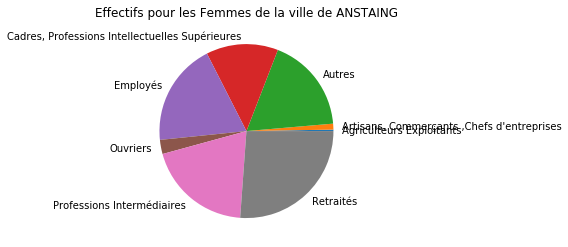

In [9]:
# Récupération des données pour le camembert selon un code postal et un genre passés en paramètres

def camembert(code, genre):
    pass 


    
    plt.title("Effectifs pour les "+ genre + " de la ville de "+nom_ville)
    plt.pie(pourcentages, labels=libelles)

    plt.show()

camembert('59152','Femmes')

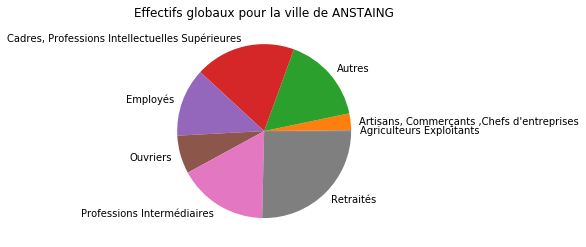

In [10]:
# Récupération des données pour le camembert selon un code postal passé en paramètre

def camembert(code):
    pass

In [11]:
conn.close()